### Importación de datos



In [2]:
import pandas as pd

url = "/content/tienda_1 .csv"
url2 = "/content/tienda_2.csv"
url3 = "/content/tienda_3.csv"
url4 = "/content/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [3]:
#Ingreso total por cada tienda (Suma de los precios, ya que se da a entender que es una unidad por producto vendido)
tiendas = [tienda1, tienda2, tienda3, tienda4]

Ingreso_x_tienda = {}
numero_tienda=1
for df in tiendas:
    total = float(df['Precio'].sum())
    Ingreso_x_tienda[numero_tienda]=round(total,3)
    numero_tienda+=1

Ingreso_x_tienda
#Convertimos a DF los ingresos por tienda
pd.set_option('display.float_format', '{:,.0f}'.format)  # afecta solo la forma de imprimir
df = pd.Series(Ingreso_x_tienda, name='Total').rename_axis('Tienda').to_frame()

# Ordenar las tiendas de mayor a menor ingreso
df = df.sort_values(by='Total', ascending=False)
df


,Total
Tienda,
1,"1,150,880,400"
2,"1,116,343,500"
3,"1,098,019,600"
4,"1,038,375,700"


# 2. Ventas por categoría

In [4]:
import pandas as pd
from functools import reduce

# Generar lista de DataFrames ya renombrados en un solo paso
total_x_categoria = [
    tienda.groupby('Categoría del Producto', as_index=False)
          .size()
          .rename(columns={'size': f'Tienda{i+1}'})
    for i, tienda in enumerate(tiendas)
]

# Unir todos los DataFrames por 'Categoría del Producto'
df_final = reduce(lambda left, right: pd.merge(left, right, on='Categoría del Producto', how='outer'),
                  total_x_categoria)

# Convertir solo columnas numéricas a int
num_cols = df_final.columns.drop('Categoría del Producto')
df_final[num_cols] = df_final[num_cols].fillna(0).astype(int)

print(df_final)


    Categoría del Producto  Tienda1  Tienda2  Tienda3  Tienda4
0  Artículos para el hogar      171      181      177      201
1     Deportes y diversión      284      275      277      277
2        Electrodomésticos      312      305      278      254
3             Electrónicos      448      422      451      451
4   Instrumentos musicales      182      224      177      170
5                 Juguetes      324      313      315      338
6                   Libros      173      197      185      187
7                  Muebles      465      442      499      480


# 3. Calificación promedio de la tienda


In [5]:
valoracion_x_tienda=[]
for tienda in tiendas:
  promedio=round(float(tienda['Calificación'].mean()),3)
  valoracion_x_tienda.append(promedio)

#print(valoracion_x_tienda)

# Crear DataFrame
df_valoraciones = pd.DataFrame({
    'Tienda': [f'Tienda{i+1}' for i in range(len(valoracion_x_tienda))],
    'Valoración promedio clientes': [f"{v:.3f}" for v in valoracion_x_tienda]
})

df_valoraciones

,Tienda,Valoración promedio clientes
0,Tienda1,3.977
1,Tienda2,4.037
2,Tienda3,4.048
3,Tienda4,3.996


# 4. Productos más y menos vendidos

In [6]:
df_final

,Categoría del Producto,Tienda1,Tienda2,Tienda3,Tienda4
0,Artículos para el hogar,171,181,177,201
1,Deportes y diversión,284,275,277,277
2,Electrodomésticos,312,305,278,254
3,Electrónicos,448,422,451,451
4,Instrumentos musicales,182,224,177,170
5,Juguetes,324,313,315,338
6,Libros,173,197,185,187
7,Muebles,465,442,499,480


In [7]:
# Calcular valores mínimo y máximo de Tiendas
productos_max_min=[]
for i in range(1,5):

  nombre=f'Tienda{i}'
  max_t1 = df_final[nombre].max()
  min_t1 = df_final[nombre].min()

  # Filtrar por esos valores y mostrar solo columnas deseadas
  df_filtrado = df_final[(df_final[nombre] == max_t1) | (df_final[nombre] == min_t1)][
      ['Categoría del Producto', nombre]
  ]
  productos_max_min.append(df_filtrado)

for i in range(4):
  print('*'*30)
  print(productos_max_min[i])


******************************
    Categoría del Producto  Tienda1
0  Artículos para el hogar      171
7                  Muebles      465
******************************
    Categoría del Producto  Tienda2
0  Artículos para el hogar      181
7                  Muebles      442
******************************
    Categoría del Producto  Tienda3
0  Artículos para el hogar      177
4   Instrumentos musicales      177
7                  Muebles      499
******************************
   Categoría del Producto  Tienda4
4  Instrumentos musicales      170
7                 Muebles      480


# 5. Envío promedio por tienda

In [8]:
promenvio_x_tienda=[]
for tienda in tiendas:
  promedio=round(float(tienda['Costo de envío'].mean()),2)
  promenvio_x_tienda.append(promedio)

#print(valoracion_x_tienda)

# Crear DataFrame
df_envios = pd.DataFrame({
    'Tienda': [f'Tienda{i+1}' for i in range(len(promenvio_x_tienda))],
    'Promedio de envío': [f"{v:.3f}" for v in promenvio_x_tienda]
})

df_envios

,Tienda,Promedio de envío
0,Tienda1,26018.610
1,Tienda2,25216.240
2,Tienda3,24805.680
3,Tienda4,23459.460


#Gráfico

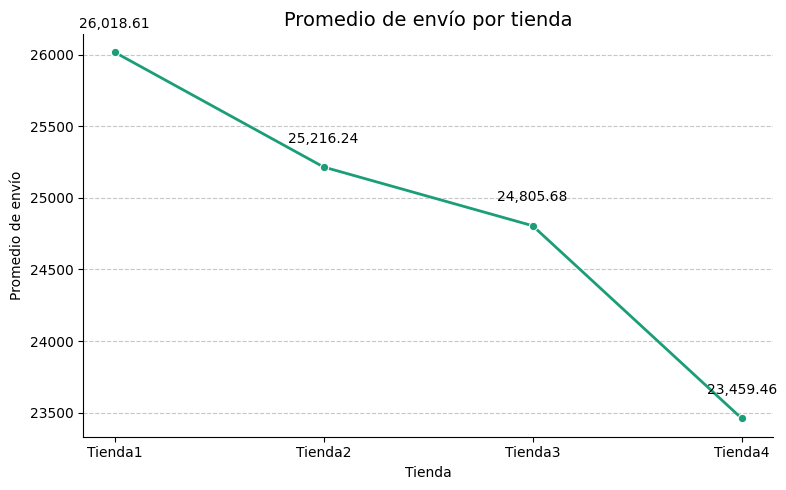

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
nombre_tiendas=['Tienda1', 'Tienda2', 'Tienda3', 'Tienda4']
# Datos
df = pd.DataFrame({
    'Tienda': nombre_tiendas,
    'Promedio de envío': promenvio_x_tienda
})

# Gráfico de líneas
plt.figure(figsize=(8, 5))
sns.lineplot(data=df, x='Tienda', y='Promedio de envío', marker='o', linewidth=2, color=sns.color_palette('Dark2')[0])

# Etiquetas numéricas sobre cada punto
for i, valor in enumerate(df['Promedio de envío']):
    plt.text(i, valor + 150, f"{valor:,.2f}", ha='center', va='bottom', fontsize=10)

# Estética
plt.title('Promedio de envío por tienda', fontsize=14)
plt.xlabel('Tienda')
plt.ylabel('Promedio de envío')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


/tmp/ipython-input-2941159732.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Tienda', y='Total de ingresos', palette='Dark2')


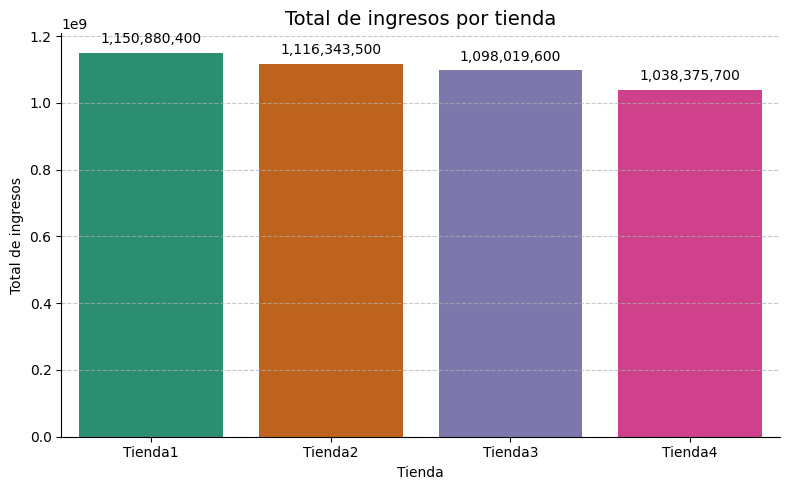

In [10]:
# Datos
df = pd.DataFrame({
    'Tienda': nombre_tiendas,
    'Total de ingresos': list(Ingreso_x_tienda.values())
})

# Gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Tienda', y='Total de ingresos', palette='Dark2')

# Etiquetas numéricas sobre cada barra
for i, valor in enumerate(df['Total de ingresos']):
    plt.text(i, valor + 20_000_000, f"{valor:,.0f}", ha='center', va='bottom', fontsize=10)

# Estética
plt.title('Total de ingresos por tienda', fontsize=14)
plt.xlabel('Tienda')
plt.ylabel('Total de ingresos')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


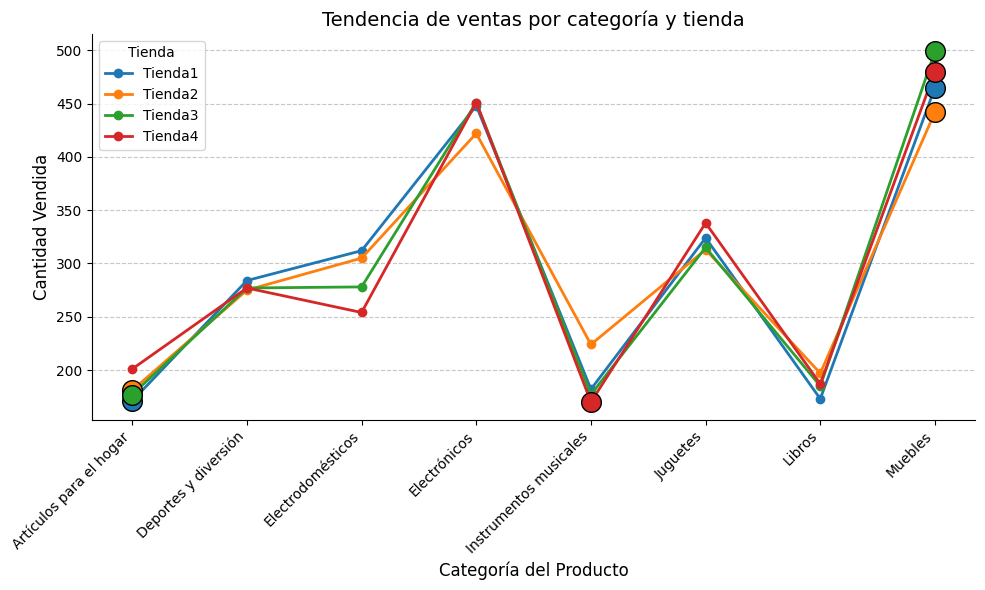

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Paleta fija para 4 tiendas
colores_tiendas = {
    'Tienda1': '#1f77b4',  # Azul
    'Tienda2': '#ff7f0e',  # Naranja
    'Tienda3': '#2ca02c',  # Verde
    'Tienda4': '#d62728'   # Rojo
}

# Convertir df_final a formato largo
df_long = df_final.melt(
    id_vars='Categoría del Producto',
    var_name='Tienda',
    value_name='Cantidad Vendida'
)

# Gráfico base
plt.figure(figsize=(10, 6))
for tienda, datos_tienda in df_long.groupby('Tienda'):
    # Línea y puntos base
    plt.plot(datos_tienda['Categoría del Producto'], datos_tienda['Cantidad Vendida'],
             marker='o', linewidth=2, label=tienda, color=colores_tiendas[tienda])

    # Máximo y mínimo
    max_row = datos_tienda.loc[datos_tienda['Cantidad Vendida'].idxmax()]
    min_row = datos_tienda.loc[datos_tienda['Cantidad Vendida'].idxmin()]

    plt.scatter(max_row['Categoría del Producto'], max_row['Cantidad Vendida'],
                s=200, edgecolor='black', facecolor=colores_tiendas[tienda], zorder=5)
    plt.scatter(min_row['Categoría del Producto'], min_row['Cantidad Vendida'],
                s=200, edgecolor='black', facecolor=colores_tiendas[tienda], zorder=5)

# Estética
plt.title('Tendencia de ventas por categoría y tienda', fontsize=14)
plt.xlabel('Categoría del Producto', fontsize=12)
plt.ylabel('Cantidad Vendida', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Tienda')

plt.tight_layout()
plt.show()


#Informe Final

##Introducción

En este desafío, se analizó el rendimiento de las cuatro tiendas de la cadena Alura Store con el fin de ayudar al Sr. Juan a decidir qué tienda vender para iniciar un nuevo emprendimiento. El análisis incluyó métricas clave como ingresos totales, categorías más y menos vendidas, calificaciones promedio de los clientes, productos más vendidos y coste de envío promedio.

El objetivo fue identificar la tienda menos eficiente y recomendar, con base en datos y evidencias, la mejor opción para su venta.

##Análisis de Resultados

###Ingresos Totales por tienda

Tienda1 lidera claramente en ingresos, mientras que Tienda4 tiene el menor volumen de ventas.

In [ ]:
df

,Tienda,Total de ingresos
0,Tienda1,"1,150,880,400"
1,Tienda2,"1,116,343,500"
2,Tienda3,"1,098,019,600"
3,Tienda4,"1,038,375,700"


###Categorías de productos más vendidos

Más vendida en general: Muebles (especialmente en Tienda1 y Tienda3).

Menos vendida en general: Artículos para el hogar y Libros.

Esto refleja que las tiendas con mayor venta de muebles concentran un porcentaje importante de sus ingresos.

###Calificación Promedio de los clientes

Aunque Tienda4 tiene menos ingresos, presenta la mejor valoración por parte de los clientes, mientras que Tienda1, a pesar de liderar en ingresos, tiene la calificación más baja.

In [ ]:
df_valoraciones

,Tienda,Valoración promedio clientes
0,Tienda1,3.977
1,Tienda2,4.037
2,Tienda3,4.048
3,Tienda4,3.996


###Productos más y menos vendidos por tienda

En Tienda1:

Más vendido: Muebles (465 unidades)

Menos vendido: Artículos para el hogar (171 unidades)

Patrón similar en Tienda3 y Tienda4, con variaciones menores.

###Coste de Envío Promedio

Los costos de envío más bajos podrían ser un factor para la buena valoración de Tienda4.

###Conclusión y recomendación

Tras analizar todos los indicadores, la tienda menos eficiente en términos comerciales es Tienda4, debido a:

*   Menores ingresos totales.
*   Menor volumen de ventas en varias categorías clave.
*   Menor potencial de crecimiento en comparación con las demás.

Si bien Tienda4 destaca por su mejor calificación de clientes y coste de envío reducido, estos factores no compensan su baja capacidad de generar ingresos.

Recomendación:
El Sr. Juan debería vender Tienda4 y conservar las demás, en especial Tienda1, que muestra la mayor capacidad de ventas y concentración de productos de alto valor. La venta de Tienda4 le permitirá obtener capital para su nuevo emprendimiento sin afectar de manera significativa el rendimiento global de la cadena.